# My interpretation of Task B,D, and E

In [1]:
#Importing packages
from selenium import webdriver
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from itertools import chain
nltk.download('punkt')
nltk.download('wordnet')

import matplotlib.pyplot as plt
%matplotlib inline  

pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saqib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saqib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 7500 rows from Edmunds

In [2]:
df = pd.read_csv("7500_comments_edmunds.csv", sep="\t", parse_dates=['Date'])
df = df[['Date', 'user_id', 'comments']]
df = df.dropna()

In [3]:
df.shape

(7506, 3)

In [4]:
df['user_id'].value_counts()

flightnurse       935
sweendogy         528
dino001           488
stickguy          453
graphicguy        437
roadburner        408
markcincinnati    399
andres3           349
nyccarguy         305
benjaminh         280
Mr_Shiftright     251
robr2             242
qbrozen           216
kyfdx             172
m6user            166
Michaell          142
habitat1          123
tlong             116
cdnpinhead        106
circlew            90
billyperksii       74
ab348              72
fedlawman          65
rayainsw           64
andys120           64
carnaught          64
henryn             62
laurasdada         57
brian125           57
billyperks4        54
ivan_99            48
breld              44
Kirstie_H          38
plekto             37
sda                37
benjaminhf         36
scwmcan            21
stever             21
jpp75              19
Sandman6472        18
jeffm5             18
justg0             18
igozoomzoom        16
xrunner2           16
wayne21            15
tifighter 

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saqib\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
%%time
# tokenization
df['tokens'] = df['comments'].map(nltk.word_tokenize)
df['tokens'] = df['tokens'].map(lambda x: set(x))

# lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df ['tokens'].map(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['lemmatized'] = df['lemmatized'].map(lambda x: set(x))

# remove stop words
stop_words = set(stopwords.words('english'))
df['processed'] = df['lemmatized'].map(lambda x: [word for word in x if word.lower() not in stop_words])

# remove punctuations
punc = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~..."
df['processed'] = df['processed'].map(lambda x: [word for word in x if word.lower() not in punc])

# remove some other stuff and return lower case
others = ["''", "``", "n't", "l", "oh", "lol", "'m", "'s"]
df['processed'] = df['processed'].map(lambda x: [word.lower() for word in x if word.lower() not in others])

Wall time: 17.8 s


In [8]:
%%time
models = pd.read_csv("models (5).csv", header = None)
models.columns = ['brand', 'model']

## clean brand list
models.loc[(models['brand'] == 'mercedes'),'brand'] = 'mercedes-benz'
models.loc[(models['brand'] == 'kia.'),'brand'] = 'kia'

def model_to_brand(word):
    if word.lower() in models['model'].values:
        brand = models[models['model'] == word].iloc[-1,0]
        print('replace ' + word + ' to ' + brand)
        return(brand)
    else:
        return(word)

df['processed'] = df['processed'].map(lambda x: [model_to_brand(word) for word in x])

replace 4-series to bmw
replace 6-series to bmw
replace 3-series to bmw
replace accent to hyundai
replace focus to ford
replace legacy to subaru
replace mercedes to mercedes-benz
replace focus to ford
replace camry to toyota
replace colorado to chevrolet
replace cx-7 to mazda
replace quattro to audi
replace cavalier to chevrolet
replace comfort to toyota
replace cruiser to chrysler
replace a4 to audi
replace passat to volkwagen
replace lacrosse to buick
replace ilx to acura
replace a4 to audi
replace a3 to audi
replace quattro to audi
replace a4 to audi
replace a3 to audi
replace quattro to audi
replace jetta to volkswagen
replace passat to volkwagen
replace quattro to audi
replace tsx to acura
replace a3 to audi
replace a4 to audi
replace a3 to audi
replace tsx to acura
replace quattro to audi
replace ilx to acura
replace ilx to acura
replace rlx to acura
replace tsx to acura
replace 328i to bmw
replace tsx to acura
replace tsx to acura
replace tsx to acura
replace legend to honda
rep

replace pilot to honda
replace cx-7 to mazda
replace pilot to honda
replace focus to ford
replace stellar to hyundai
replace quattro to audi
replace 328i to bmw
replace a4 to audi
replace city to honda
replace a4 to audi
replace chevy to chevrolet
replace altima to nissan
replace impala to chevrolet
replace city to honda
replace a3 to audi
replace a3 to audi
replace a4 to audi
replace quattro to audi
replace vw to volkswagen
replace a6 to audi
replace a4 to audi
replace mercedes to mercedes-benz
replace genesis to hyundai
replace a3 to audi
replace ilx to acura
replace ilx to acura
replace civic to honda
replace civic to honda
replace q7 to audi
replace ilx to acura
replace rsx to acura
replace civic to honda
replace q5 to audi
replace q7 to audi
replace vw to volkswagen
replace pony to hyundai
replace rsx to acura
replace civic to honda
replace q5 to audi
replace q7 to audi
replace vw to volkswagen
replace pony to hyundai
replace q5 to audi
replace q5 to audi
replace quattro to audi
r

replace nsx to honda
replace toyotas to toyota
replace equus to hyundai
replace e-class to mercedes-benz
replace mercedes to mercedes-benz
replace rlx to acura
replace s60 to volvo
replace genesis to hyundai
replace nsx to honda
replace optima to kia
replace rsx to acura
replace 528i to bmw
replace mustang to ford
replace challenger to dodge
replace mercedes to mercedes-benz
replace genesis to hyundai
replace amaze to honda
replace genesis to hyundai
replace a6 to audi
replace m3 to bmw
replace toyotas to toyota
replace mercedes to mercedes-benz
replace genesis to hyundai
replace a8 to audi
replace 3-series to bmw
replace agile to chevrolet
replace 328i to bmw
replace mercedes to mercedes-benz
replace m3 to bmw
replace legacy to subaru
replace tsx to acura
replace 3er to bmw
replace q7 to audi
replace legacy to subaru
replace quattro to audi
replace q3 to audi
replace q5 to audi
replace 3er to bmw
replace tiguan to volkswagen
replace a4 to audi
replace mercedes to mercedes-benz
replace

replace q3 to audi
replace a4 to audi
replace 335i to bmw
replace 3-series to bmw
replace a4 to audi
replace c-class to mercedes-benz
replace mercedes to mercedes-benz
replace nissans to nissan
replace 335i to bmw
replace xdrive to bmw
replace genesis to hyundai
replace passats to volkswagen
replace accords to honda
replace 328i to bmw
replace camrys to toyota
replace m3 to bmw
replace 5-series to bmw
replace e-class to mercedes-benz
replace m3 to bmw
replace s60 to volvo
replace 335i to bmw
replace 4-series to bmw
replace comfort to toyota
replace e-class to mercedes-benz
replace mercedes to mercedes-benz
replace benz to mercedes-benz
replace s60 to volvo
replace a3 to audi
replace s60 to volvo
replace regal to buick
replace a3 to audi
replace regal to buick
replace regal to buick
replace regal to buick
replace avalon to toyota
replace azera to hyundai
replace s60 to volvo
replace a3 to audi
replace regal to buick
replace s60 to volvo
replace a3 to audi
replace regal to buick
replace 

replace escalade to cadillac
replace nsx to honda
replace pony to hyundai
replace city to honda
replace bmws to bmw
replace comfort to toyota
replace comfort to toyota
replace a5 to audi
replace quattro to audi
replace accord to honda
replace alpina to bmw
replace alpina to bmw
replace m5 to bmw
replace focus to ford
replace focus to ford
replace a4 to audi
replace amaze to honda
replace legacy to subaru
replace a4 to audi
replace amaze to honda
replace 335d to bmw
replace charger to dodge
replace quattro to audi
replace a6 to audi
replace quattro to audi
replace genesis to hyundai
replace genesis to hyundai
replace outback to subaru
replace 3-series to bmw
replace city to honda
replace city to honda
replace mercedes to mercedes-benz
replace accent to hyundai
replace benz to mercedes-benz
replace c-class to mercedes-benz
replace a7 to audi
replace 3-series to bmw
replace mercedes to mercedes-benz
replace accent to hyundai
replace benz to mercedes-benz
replace c-class to mercedes-benz
r

replace wrx to subaru
replace q7 to audi
replace golf to volkswagen
replace vw to volkswagen
replace legacy to subaru
replace maxima to nissan
replace wave to pontiac
replace jetta to volkswagen
replace jetta to volkswagen
replace maxima to nissan
replace shuttle to honda
replace a6 to audi
replace a3 to audi
replace jetta to volkswagen
replace chevy to chevrolet
replace mercedes to mercedes-benz
replace a6 to audi
replace a3 to audi
replace tahoe to chevrolet
replace q3 to audi
replace vw to volkswagen
replace a6 to audi
replace a3 to audi
replace charger to dodge
replace vw to volkswagen
replace jetta to volkswagen
replace mustang to ford
replace jetta to volkswagen
replace camaro to chevrolet
replace a4 to audi
replace mercedes to mercedes-benz
replace a6 to audi
replace q3 to audi
replace vw to volkswagen
replace a6 to audi
replace xc90 to volvo
replace xc90 to volvo
replace s60 to volvo
replace xc90 to volvo
replace optima to kia
replace a3 to audi
replace jetta to volkswagen
repl

replace volt to chevrolet
replace prius to toyota
replace gto to pontiac
replace seats to seat
replace gto to pontiac
replace seats to seat
replace pony to hyundai
replace a4 to audi
replace century to toyota
replace cars to car
replace a6 to audi
replace a4 to audi
replace c-class to mercedes-benz
replace c-class to mercedes-benz
replace 3-series to bmw
replace benz to mercedes-benz
replace c-class to mercedes-benz
replace mercedes to mercedes-benz
replace 335i to bmw
replace c-class to mercedes-benz
replace c-class to mercedes-benz
replace e-class to mercedes-benz
replace mercedes to mercedes-benz
replace benz to mercedes-benz
replace c-class to mercedes-benz
replace 3-series to bmw
replace s-class to mercedes-benz
replace mazda3 to mazda
replace comfort to toyota
replace comfort to toyota
replace c-class to mercedes-benz
replace c-class to mercedes-benz
replace q5 to audi
replace mercedes to mercedes-benz
replace leaf to nissan
replace xts to cadillac
replace a6 to audi
replace focu

replace vw to volkswagen
replace vws to volkswagen
replace a3 to audi
replace vw to volkswagen
replace golf to volkswagen
replace vw to volkswagen
replace vw to volkswagen
replace vw to volkswagen
replace vw to volkswagen
replace wave to pontiac
replace vw to volkswagen
replace q5 to audi
replace a5 to audi
replace a4 to audi
replace a6 to audi
replace a3 to audi
replace q3 to audi
replace vw to volkswagen
replace vw to volkswagen
replace vw to volkswagen
replace vw to volkswagen
replace spark to chevrolet
replace camry to toyota
replace accord to honda
replace mercedes to mercedes-benz
replace lacrosse to buick
replace camry to toyota
replace mercedes to mercedes-benz
replace mercedes to mercedes-benz
replace 335i to bmw
replace 328i to bmw
replace a6 to audi
replace a8 to audi
replace focus to ford
replace camry to toyota
replace civic to honda
replace 335i to bmw
replace xdrive to bmw
replace a6 to audi
replace accord to honda
replace jetta to volkswagen
replace bmws to bmw
replace 

replace bmws to bmw
replace escalade to cadillac
replace a6 to audi
replace escalade to cadillac
replace pony to hyundai
replace a6 to audi
replace a6 to audi
replace mercedes to mercedes-benz
replace benz to mercedes-benz
replace a6 to audi
replace a6 to audi
replace mercedes to mercedes-benz
replace benz to mercedes-benz
replace vw to volkswagen
replace vw to volkswagen
replace 328i to bmw
replace bmws to bmw
replace mercedes-benz to mercedes-benz
replace mercedes-benz to mercedes-benz
replace passat to volkwagen
replace accord to honda
replace accord to honda
replace accord to honda
replace accord to honda
replace a4 to audi
replace accord to honda
replace camry to toyota
replace chevy to chevrolet
replace genesis to hyundai
replace cr-v to honda
replace impala to chevrolet
replace cars to car
replace cars to car
replace vw to volkswagen
replace bmws to bmw
replace a4 to audi
replace a4 to audi
replace a4 to audi
replace a3 to audi
replace c-class to mercedes-benz
replace a4 to audi

replace sonata to hyundai
replace accord to honda
replace accord to honda
replace accord to honda
replace accords to honda
replace accord to honda
replace accords to honda
replace accord to honda
replace accord to honda
replace optima to kia
replace accord to honda
replace optima to kia
replace camry to toyota
replace accord to honda
replace optima to kia
replace camry to toyota
replace camry to toyota
replace accord to honda
replace optima to kia
replace forte to kia
replace accord to honda
replace ilx to acura
replace rdx to acura
replace cr-v to honda
replace ilx to acura
replace accord to honda
replace accord to honda
replace accord to honda
replace pilot to honda
replace rdx to acura
replace accord to honda
replace accords to honda
replace rdx to acura
replace accord to honda
replace rdx to acura
replace accord to honda
replace accord to honda
replace accord to honda
replace tsx to acura
replace bmws to bmw
replace accord to honda
replace accord to honda
replace accord to honda
re

replace mercedes to mercedes-benz
replace genesis to hyundai
replace camry to toyota
replace camry to toyota
replace camry to toyota
replace camry to toyota
replace lx to chrysler
replace rlx to acura
replace civic to honda
replace accord to honda
replace rlx to acura
replace lx to chrysler
replace rlx to acura
replace civic to honda
replace e-class to mercedes-benz
replace civic to honda
replace rlx to acura
replace accord to honda
replace mercedes to mercedes-benz
replace rlx to acura
replace accord to honda
replace rlx to acura
replace sonata to hyundai
replace rdx to acura
replace rlx to acura
replace accord to honda
replace ilx to acura
replace ilx to acura
replace camry to toyota
replace seats to seat
replace accord to honda
replace seats to seat
replace 5-series to bmw
replace k900 to kia
replace click to hyundai
replace k900 to kia
replace m5 to bmw
replace rlx to acura
replace rlx to acura
replace ilx to acura
replace mercedes to mercedes-benz
replace civic to honda
replace il

replace accord to honda
replace rogue to nissan
replace comfort to toyota
replace crv to honda
replace 328i to bmw
replace 335i to bmw
replace 335i to bmw
replace 535i to bmw
replace golf to volkswagen
replace vw to volkswagen
replace m3 to bmw
replace altima to nissan
replace genesis to hyundai
replace equus to hyundai
replace mercedes to mercedes-benz
replace genesis to hyundai
replace legacy to subaru
replace elantra to hyundai
replace mercedes to mercedes-benz
replace legend to honda
replace a6 to audi
replace g37 to infiniti
replace altima to nissan
replace g37 to infiniti
replace 335i to bmw
replace m3 to bmw
replace 335i to bmw
replace mercedes to mercedes-benz
replace 335i to bmw
replace mercedes to mercedes-benz
replace 335i to bmw
replace 335i to bmw
replace 328i to bmw
replace m3 to bmw
replace tsx to acura
replace mercedes-benz to mercedes-benz
replace a6 to audi
replace 328i to bmw
replace genesis to hyundai
replace genesis to hyundai
replace genesis to hyundai
replace lea

replace prelude to honda
replace maxima to nissan
replace i30 to hyundai
replace m3 to bmw
replace hondas to honda
replace chevy to chevrolet
replace mdx to acura
replace i30 to hyundai
replace vw to volkswagen
replace 328i to bmw
replace m3 to bmw
replace civic to honda
replace 335d to bmw
replace 328i to bmw
replace 335d to bmw
replace 335d to bmw
replace vw to volkswagen
replace mdx to acura
replace city to honda
replace 335d to bmw
replace 328i to bmw
replace 335d to bmw
replace 335d to bmw
replace 335d to bmw
replace cruiser to chrysler
replace m3 to bmw
replace 335i to bmw
replace m3 to bmw
replace mdx to acura
replace fusion to ford
replace jetta to volkswagen
replace passat to volkwagen
replace 335d to bmw
replace vw to volkswagen
replace golf to volkswagen
replace 335d to bmw
replace q5 to audi
replace tiguan to volkswagen
replace passat to volkwagen
replace q3 to audi
replace vw to volkswagen
replace q7 to audi
replace a3 to audi
replace 335d to bmw
replace a8 to audi
replace

replace camry to toyota
replace stream to honda
replace avalon to toyota
replace camry to toyota
replace 330ci to bmw
replace camry to toyota
replace passat to volkwagen
replace avalon to toyota
replace q50 to infiniti
replace s60 to volvo
replace a4 to audi
replace agile to chevrolet
replace frontier to nissan
replace explorer to ford
replace explorer to ford
replace rdx to acura
replace civic to honda
replace rx-8 to mazda
replace 3-series to bmw
replace 330ci to bmw
replace bmws to bmw
replace a4 to audi
replace sienna to toyota
replace integra to acura
replace ilx to acura
replace civic to honda
replace tsx to acura
replace civic to honda
replace civic to honda
replace wrx to subaru
replace wrx to subaru
replace 328i to bmw
replace civic to honda
replace 3-series to bmw
replace quattro to audi
replace cr-v to honda
replace accord to honda
replace rlx to acura
replace 335i to bmw
replace xdrive to bmw
replace 328i to bmw
replace pilot to honda
replace pilot to honda
replace 335d to 

replace 335i to bmw
replace bmws to bmw
replace altima to nissan
replace altima to nissan
replace altima to nissan
replace altima to nissan
replace 3-series to bmw
replace rogue to nissan
replace v60 to volvo
replace s60 to volvo
replace v60 to volvo
replace bmws to bmw
replace mercedes to mercedes-benz
replace bmws to bmw
replace city to honda
replace xdrive to bmw
replace rlx to acura
replace 3-series to bmw
replace explorer to ford
replace city to honda
replace 3-series to bmw
replace vw to volkswagen
replace 335d to bmw
replace chevy to chevrolet
replace accords to honda
replace kingdom to toyota
replace mercedes to mercedes-benz
replace 335i to bmw
replace benz to mercedes-benz
replace 328i to bmw
replace 335d to bmw
replace 328i to bmw
replace mercedes to mercedes-benz
replace prius to toyota
replace 335d to bmw
replace escape to ford
replace 3-series to bmw
replace rogue to nissan
replace legend to honda
replace bmws to bmw
replace crv to honda
replace benz to mercedes-benz
repl

replace gti to volkswagen
replace vw to volkswagen
replace accord to honda
replace vw to volkswagen
replace xts to cadillac
replace impala to chevrolet
replace mercedes to mercedes-benz
replace bmws to bmw
replace chevy to chevrolet
replace cadenza to kia
replace vws to volkswagen
replace quattro to audi
replace vw to volkswagen
replace hondas to honda
replace vw to volkswagen
replace q5 to audi
replace a4 to audi
replace a8 to audi
replace a3 to audi
replace pony to hyundai
replace 335i to bmw
replace 328i to bmw
replace 335i to bmw
replace 328i to bmw
replace m3 to bmw
replace 335i to bmw
replace 335i to bmw
replace 4-series to bmw
replace 335i to bmw
replace 335i to bmw
replace q5 to audi
replace 335i to bmw
replace 330ci to bmw
replace 328i to bmw
replace leaf to nissan
replace aveo to chevrolet
replace a4 to audi
replace odyssey to honda
replace chevy to chevrolet
replace a6 to audi
replace vw to volkswagen
replace odyssey to honda
replace hondas to honda
replace 528i to bmw
repla

replace mercedes to mercedes-benz
replace a6 to audi
replace 535i to bmw
replace a6 to audi
replace fx35 to infiniti
replace corvette to chevrolet
replace 328i to bmw
replace city to honda
replace sonata to hyundai
replace m3 to bmw
replace q50 to infiniti
replace g37 to infiniti
replace q50 to infiniti
replace q50 to infiniti
replace mercedes to mercedes-benz
replace q50 to infiniti
replace q50 to infiniti
replace a4 to audi
replace insight to honda
replace benz to mercedes-benz
replace a5 to audi
replace a5 to audi
replace a5 to audi
replace rdx to acura
replace benz to mercedes-benz
replace benz to mercedes-benz
replace mustang to ford
replace 328i to bmw
replace click to hyundai
replace mustang to ford
replace accord to honda
replace charger to dodge
replace a3 to audi
replace bmws to bmw
replace v60 to volvo
replace v60 to volvo
replace jetta to volkswagen
replace v60 to volvo
replace a4 to audi
replace vw to volkswagen
replace 3-series to bmw
replace 328i to bmw
replace cars to c

In [9]:
all_words = pd.Series(chain(*list(df['processed'])))
word_frequency = all_words.value_counts()
word_frequency

car                                                                         3430
bmw                                                                         2551
wa                                                                          2300
like                                                                        2075
said                                                                        2054
one                                                                         2040
would                                                                       1965
audi                                                                        1911
ha                                                                          1733
get                                                                         1655
new                                                                         1508
think                                                                       1482
year                        

# Task A: Top 10 brands by frequency

In [10]:
brand_list = models['brand'].drop_duplicates().values
no_use = ['car', 'sedan', 'seat', 'problem']
brand_list = [ x for x in brand_list if x not in no_use]

tmp = pd.DataFrame(word_frequency)
tmp['word'] = word_frequency.index
mask = tmp['word'].isin(brand_list)
brand_frequency = word_frequency[mask]
top10_brands = brand_frequency.head(10)
top10_brands

bmw              2551
audi             1911
acura            1134
honda            1000
infiniti          662
toyota            488
volkswagen        483
mercedes-benz     411
hyundai           396
ford              376
dtype: int64

In [11]:
# lift(bmw, audi)
a = 'bmw'
b = 'audi'
N = df['processed'].shape[0]
N_ab = sum(df['processed'].map(lambda x: a in x and b in x))
N_a = sum(df['processed'].map(lambda x: a in x))
N_b = sum(df['processed'].map(lambda x: b in x))
print(N, N_ab, N_a, N_b, N*N_ab/(N_a*N_b))

def lift(a, b):
    N = df['processed'].shape[0]
    N_ab = sum(df['processed'].map(lambda x: a in x and b in x))
    N_a = sum(df['processed'].map(lambda x: a in x))
    N_b = sum(df['processed'].map(lambda x: b in x))
    return(N*N_ab/(N_a*N_b))

lift_brands = pd.DataFrame(top10_brands.index.values, columns=['brand'])
for make in top10_brands.index.values:
    lift_brands[make] = lift_brands['brand'].map(lambda x: lift(x, make))
lift_brands = lift_brands.set_index('brand')
lift_brands

7506 567 1930 1234 1.7869777714328903


,bmw,audi,acura,honda,infiniti,toyota,volkswagen,mercedes-benz,hyundai,ford
brand,,,,,,,,,,
bmw,3.889119,1.786978,1.325522,1.098865,1.894895,1.380993,1.200739,2.622126,1.247200,1.406985
audi,1.786978,6.082658,2.173920,1.583850,2.593196,1.508753,2.675705,3.480728,1.803823,1.224836
acura,1.325522,2.173920,8.882840,3.260322,3.298343,1.553917,1.359123,2.617041,1.531524,1.121724
honda,1.098865,1.583850,3.260322,10.396122,1.409297,3.202983,2.073543,1.737595,1.828284,2.022454
infiniti,1.894895,2.593196,3.298343,1.409297,14.746562,1.617116,1.329608,3.467322,2.034009,1.258239
toyota,1.380993,1.508753,1.553917,3.202983,1.617116,19.597911,2.302487,1.998654,3.041055,2.742370
volkswagen,1.200739,2.675705,1.359123,2.073543,1.329608,2.302487,20.508197,1.742906,2.192256,2.799754
mercedes-benz,2.622126,3.480728,2.617041,1.737595,3.467322,1.998654,1.742906,21.263456,2.126346,2.177146
hyundai,1.247200,1.803823,1.531524,1.828284,2.034009,3.041055,2.192256,2.126346,25.882759,2.031752


In [12]:
inverse_lift_brands = lift_brands.apply(lambda x: 1/x)
inverse_lift_brands

,bmw,audi,acura,honda,infiniti,toyota,volkswagen,mercedes-benz,hyundai,ford
brand,,,,,,,,,,
bmw,0.257128,0.559604,0.754420,0.910030,0.527734,0.724117,0.832820,0.381370,0.801796,0.710740
audi,0.559604,0.164402,0.459998,0.631373,0.385625,0.662799,0.373733,0.287296,0.554378,0.816436
acura,0.754420,0.459998,0.112577,0.306718,0.303182,0.643535,0.735769,0.382111,0.652944,0.891485
honda,0.910030,0.631373,0.306718,0.096190,0.709573,0.312209,0.482266,0.575508,0.546961,0.494449
infiniti,0.527734,0.385625,0.303182,0.709573,0.067812,0.618385,0.752101,0.288407,0.491640,0.794762
toyota,0.724117,0.662799,0.643535,0.312209,0.618385,0.051026,0.434313,0.500337,0.328833,0.364648
volkswagen,0.832820,0.373733,0.735769,0.482266,0.752101,0.434313,0.048761,0.573754,0.456151,0.357174
mercedes-benz,0.381370,0.287296,0.382111,0.575508,0.288407,0.500337,0.573754,0.047029,0.470290,0.459317
hyundai,0.801796,0.554378,0.652944,0.546961,0.491640,0.328833,0.456151,0.470290,0.038636,0.492186


In [13]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, random_state=4)
mds = embedding.fit_transform(inverse_lift_brands)
mds_output = pd.DataFrame(mds, index=inverse_lift_brands.index.values, columns=['x', 'y'])
mds_output

C:\Users\saqib\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


,x,y
bmw,-0.287250,0.814022
audi,-0.409649,-0.077906
acura,-0.626046,-0.420154
honda,0.159613,-0.636397
infiniti,-0.700577,0.159885
toyota,0.518134,-0.097765
volkswagen,0.572895,-0.392991
mercedes-benz,-0.339050,0.274261
hyundai,0.305924,0.137011
ford,0.806006,0.240034


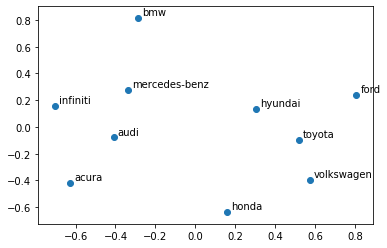

In [14]:
fig, ax = plt.subplots()
ax.scatter(mds_output['x'], mds_output['y'])
for brand in inverse_lift_brands.index.values:
    ax.text(mds_output.loc[brand, 'x']+0.02, mds_output.loc[brand, 'y']+0.02, brand)

# Task B:

ACURA: 

It is known for it's reliability and it has some significant lift association with Audi and Mercedes Benz. Perhaps, the drivers of Acura want to shift to Audi or Mercedes Benz. So, they have to market the reliability of an Acura car and make some slight improvements in the performance, so that they can stop their consumers from shifting to other luxury brands and even directly competing with them as well.

HONDA:

It has some significant lift association with Acura, Toyota, Volkswagen and Ford. Having such intense competition might have some negative impact on sales. What they can do is to try differentiate their product (like improving their reliabilty and ease of driving). This will slightly influence the customers to look at Honda more favorably with respect to other competent brands.

# Task C

In [18]:
word_frequency[:500]

car               3430
bmw               2551
wa                2300
like              2075
said              2054
one               2040
would             1965
audi              1911
ha                1733
get               1655
new               1508
think             1482
year              1348
even              1273
time              1188
good              1185
acura             1134
much              1132
well              1125
know              1070
really            1069
drive             1023
honda             1000
doe                983
still              983
could              978
price              973
make               973
go                 925
also               922
better             915
dealer             897
see                855
thing              847
look               833
want               824
people             816
say                815
way                796
've                777
back               756
3                  741
model              721
going      

In [19]:
attribute_dict = { 
    'performance': ['drive', 'engine', 'sport', 'driving', 'performance', 'power', 'spped', 
                    'fast', 'faster', 'sporty', 'horsepower', 'powerful'],
    
    'fuel_efficiency': ['mile', 'mileage', 'oil', 'diesel', 'mpg', 'gas', 'fuel'],
    
    'look': ['look', 'nice', 'looking', 'design', 'nicer', 'style', 'attractive', 'designed', 'looked'],
    
    'luxury': ['great', 'brand', 'luxury', 'best', 'premium'],
    
    'reliability': ['issue', 'problem', 'recall', 'trouble', 'concerned', 'suspension', 'reliable',
                   'service', 'warranty', 'durability', 'quality'],
    
    'price': ['money', 'msrp', 'price', 'sale', 'offer', 'discount', 'bargain', 'grand', 'expensive',
             'cheap', 'cheaper', 'incentive', 'worth'],
    
    'size': ['big', 'huge', 'large', 'size', 'weight', 'bigger', 'sticker', 'roof',
            'little', 'small', 'light', 'smaller', 'biggest'],

    'interior': ['seat', 'interior', 'leather', 'steering', 'inside', 'radio', 'noise', 'quiet'],

    'experience': ['experience', 'speciall', 'interesting', 'impressive', 'surprised', 'amazing', 
                   'fun', 'happy', 'enthusiast'],
    
    'safety': ['safety', 'life', 'safe']}

In [20]:
def count_attribute(df, attribute_terms):
    return(np.sum(df['processed'].map(lambda x: len([term for term in attribute_terms if term in x])>=1 )))

top_attributes = pd.DataFrame(pd.Series(attribute_dict), columns=['attribute_terms'])
top_attributes['count'] = top_attributes['attribute_terms'].map(lambda x: count_attribute(df, x))

top_attributes.sort_values(by=['count'], ascending=False)[:5]

,attribute_terms,count
performance,"[drive, engine, sport, driving, performance, p...",2646
price,"[money, msrp, price, sale, offer, discount, ba...",2259
look,"[look, nice, looking, design, nicer, style, at...",1863
size,"[big, huge, large, size, weight, bigger, stick...",1716
luxury,"[great, brand, luxury, best, premium]",1654


In [21]:
def lift_attribute_to_brands(attribute, attribute_dict, brand_list, df):
    '''
    attribute is a string
    
    attribute_dict is the dictionary whose keys are attibutes and values are words(attribute_terms).
    
    df is the processed dataframe contains processed comments 
    '''
    attribute_terms = attribute_dict[attribute]
    output = dict()
    for brand in brand_list.index.values:
        df_a = df[df['processed'].map(lambda x: len([term for term in attribute_terms if term in x])>=1)]
        N_a = df_a.shape[0] # count of comments w/ attribute
        N_b = sum(df['processed'].map(lambda x: brand in x)) # count of comments w/ brand
        N = df['processed'].shape[0]
        N_ab = sum(df_a['processed'].map(lambda x: brand in x)) # count of cooments w/ attribute and brand
        
        output[brand] = N*N_ab/(N_a*N_b)
        
    return(output)

brand_list = top10_brands[:5]

for attribute in top_attributes.index.values:
    print(attribute)
    output = lift_attribute_to_brands(attribute, attribute_dict, brand_list, df)
    output = pd.Series(output).sort_values(ascending=False)
    print(output)
    print('')

performance
audi        1.535607
bmw         1.508026
infiniti    1.471312
honda       1.410509
acura       1.366333
dtype: float64

fuel_efficiency
honda       1.641091
audi        1.424646
acura       1.356557
bmw         1.276385
infiniti    1.180158
dtype: float64

look
audi        1.629225
acura       1.597290
infiniti    1.591014
honda       1.579228
bmw         1.317249
dtype: float64

luxury
infiniti    2.130851
audi        1.908645
acura       1.858200
honda       1.835349
bmw         1.497805
dtype: float64

reliability
audi        1.778404
honda       1.560677
acura       1.527074
bmw         1.499618
infiniti    1.490724
dtype: float64

price
infiniti    1.827816
audi        1.701744
acura       1.592541
bmw         1.527069
honda       1.518690
dtype: float64

size
honda       1.781154
audi        1.743979
acura       1.563297
bmw         1.382496
infiniti    1.357784
dtype: float64

interior
audi        1.861030
honda       1.782728
infiniti    1.650337
acura       1.6354

# Task D

Acura:
    
Acura was known for it's reliability. But, from the attribute association to brands, Acura has lost it's position to the luxury brand Audi and another competitor, Honda. Also, Acura doesn't do significantly well in other attributes as well apart from looks. So, the marketing managers should get rid of the growing concern over the reliability of Acura and capture the attribute again. This is the way the brand can reinvent itself and get back in the race.

BMW: 

Though BMW claims they are ‘The Ultimate Driving Machine’, the lift calculations shows that Audi is still leading in performance. Upon considering other attributes, BMW does not score well either. If the tagline must genuinely reflect what BMW offers, the performance factor must be improved. BMW also scores low on the interior attribute. BMW being the luxury brand it is, if must retain its hold as one, needs to have a look at their interior as well, as luxury brands are sought out based on their interior along with the performance. Also, it has considerably work on the safety by adding new safety features.





# Task E

In [38]:
aspiration_dict = { 'aspiration': ['dream car','dreamed','dreaming','dream of','dream to',"couldn't afford",'wish','best',
                                  'love to have','wanted to','future car']}

In [39]:
brand_list = top10_brands

output = lift_attribute_to_brands('aspiration', aspiration_dict, brand_list, df)
output = pd.Series(output).sort_values(ascending=False)
print(output)
print('')

infiniti         2.372665
mercedes-benz    2.251934
acura            1.917680
toyota           1.875971
audi             1.796304
honda            1.736216
hyundai          1.581431
bmw              1.497034
volkswagen       1.253047
ford             1.252191
dtype: float64

